# Image Segmentation

darvinyi[at]Stanford.edu

1. Open Q&A (e.g. problem set questions)
2. Thresholding
3. Otsu's Method
4. Example: Cell Growth

## Open Q&A

Ask anything.  We're here to help.

## Binary Thresholding (Discrete Representation)

Basically, transform pixels (8-bit, 16-bit, n-bit, or floating point numbers) into smaller bit-size integers (e.g. binary).

$$ f: \mathbb{R}^{(m,n)} \rightarrow \left\{ 0,1,...,c \right\}^{m,n} $$

A **VERY** simplistic way to to convert to a binary image would be to repeat a boolean statement per pixel.

$$ f: \mathbb{R}^{(m,n)} \rightarrow \left\{ 0,1 \right\}^{m,n} $$

```
# Defining f: img -> bw with some threshold threshold
for i in [1,m]:
    for j in [1,n]:
        bw[i,j] = (img[i,j] > threshold)
    endfor
endfor
```

(-0.5, 2047.5, 740.5, -0.5)

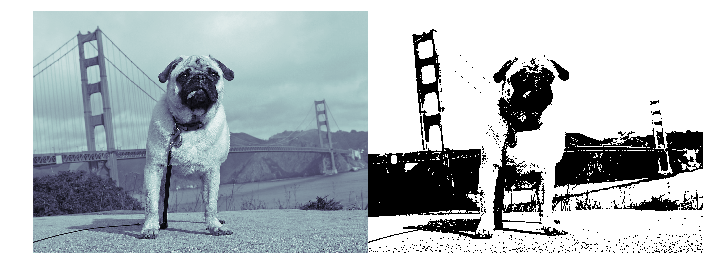

In [48]:
THRESHOLD = 0.5

import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

#Filepath <- change this for you
path_img = '20170414_figures\\dog.jpg'

#Reading in the image and thresholding them
img = scipy.misc.imread(path_img) #reading in image
img = img.astype(np.float32)      #int -> float
if len(img.shape) == 3:
    img = np.mean(img, axis=2)
img -= np.min(img)                #minimum normalization
img /= np.max(img)                #maximum normalization
bw  = (img > THRESHOLD)

#Plotting
plt.rcParams['figure.figsize'] = (12, 8)
plt.imshow(np.concatenate((img,bw), axis=1), cmap='bone')
plt.axis('off')

## Otsu's Method

A purely statistical concept for threshold choosing.

$$ \sigma_w^2 (t) = p_a (t) \sigma_a^2 (t) + p_b (t) \sigma_b^2 (t) $$

But what does it mean?

(0, 10000)

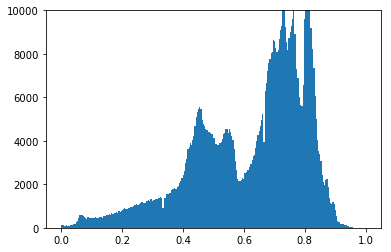

In [50]:
import numpy as np
import scipy.misc
from skimage import filters
import matplotlib.pyplot as plt
%matplotlib inline


#Filepath <- change this for you
path_img = '20170414_figures\\dog.jpg'


# Reshape image so that it's an array.
img = scipy.misc.imread(path_img) #reading in image
img = img.astype(np.float32)      #int -> float
if len(img.shape) == 3:
    img = np.mean(img, axis=2)
img -= np.min(img)                #minimum normalization
img /= np.max(img)                #maximum normalization
img_array = img.reshape([-1])

# Plot the histogram.
_ = plt.hist(img_array,256)
plt.ylim([0,10000])

Otsu's method threshold: 0.580078125


(0, 10000)

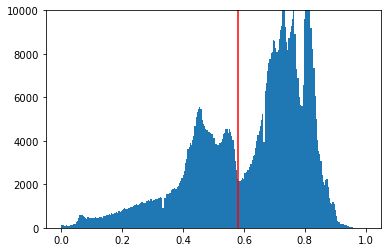

In [51]:
# Otsu's Method!
thresh = filters.threshold_otsu(img_array)
print "Otsu's method threshold: " + str(thresh)

# Plot the histogram.
arr = plt.hist(img_array,256)
plt.plot([thresh,thresh], [0,np.max(arr[0])], color='r')
plt.ylim([0,10000])

(-0.5, 2047.5, 740.5, -0.5)

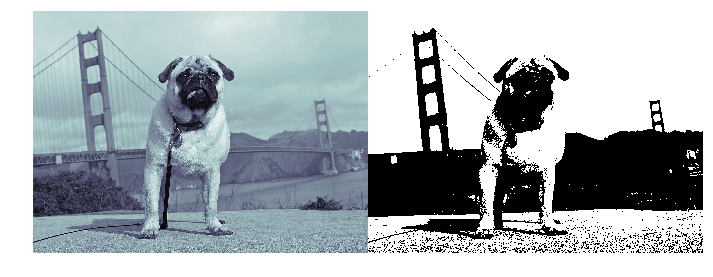

In [52]:
#Plotting
bw  = (img > thresh)
plt.rcParams['figure.figsize'] = (12, 8)
plt.imshow(np.concatenate((img,bw), axis=1), cmap='bone')
plt.axis('off')

(0, 10000)

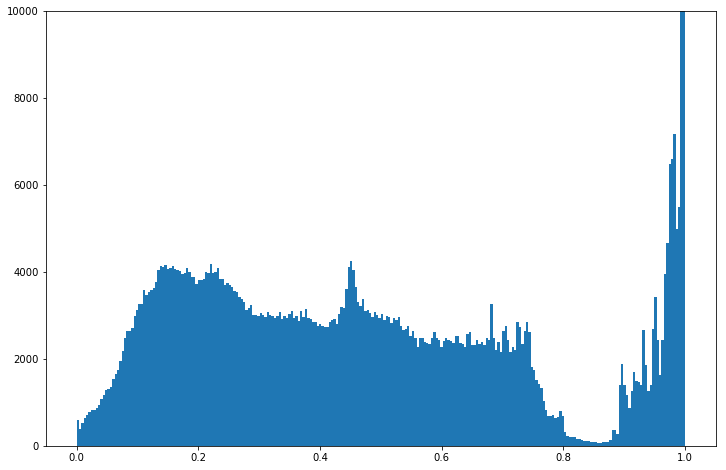

In [53]:
#Filepath <- change this for you
path_img = '20170414_figures\\town.jpg'


# Reshape image so that it's an array.
img = scipy.misc.imread(path_img) #reading in image
img = img.astype(np.float32)      #int -> float
if len(img.shape) == 3:
    img = np.mean(img, axis=2)
img -= np.min(img)                #minimum normalization
img /= np.max(img)                #maximum normalization
img_array = img.reshape([-1])

# Plot the histogram.
_ = plt.hist(img_array,256)
plt.ylim([0,10000])

Otsu's method threshold: 0.595703125


(0, 10000)

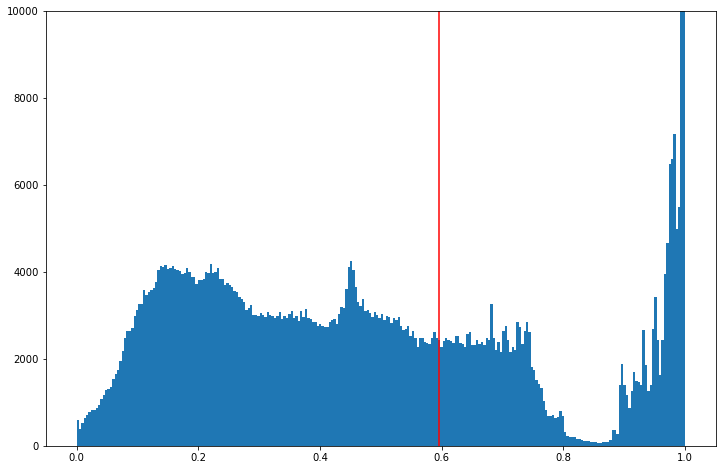

In [54]:
#Otsu's Method!
thresh = filters.threshold_otsu(img_array)
print "Otsu's method threshold: " + str(thresh)

# Plot the histogram.
arr = plt.hist(img_array,256)
plt.plot([thresh,thresh], [0,np.max(arr[0])], color='r')
plt.ylim([0,10000])

(-0.5, 2047.5, 767.5, -0.5)

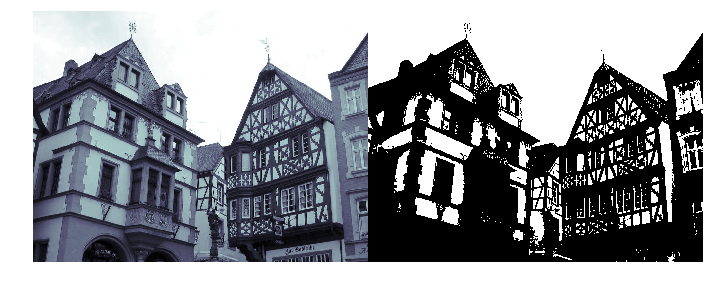

In [55]:
#Plotting
bw  = (img > thresh)
plt.rcParams['figure.figsize'] = (12, 8)
plt.imshow(np.concatenate((img,bw), axis=1), cmap='bone')
plt.axis('off')

The threshold isn't where you'd (or at least where I'd) imagine.  Why is that?

What would happen if we chose the more "obvious" threshold?

(-0.5, 2047.5, 767.5, -0.5)

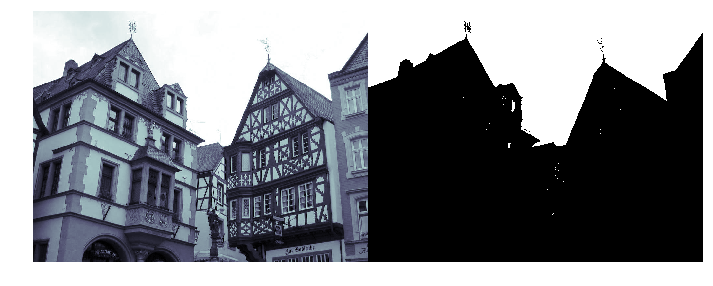

In [56]:
#Plotting
bw  = (img > 0.85)
plt.rcParams['figure.figsize'] = (12, 8)
plt.imshow(np.concatenate((img,bw), axis=1), cmap='bone')
plt.axis('off')

## Cell Size Example



In [1]:
import numpy as np
from skimage import io

path_img = '20170414_figures\\bacterium_1.tif'
img = io.imread(path_img)
print img.shape

(1900L, 100L, 150L)


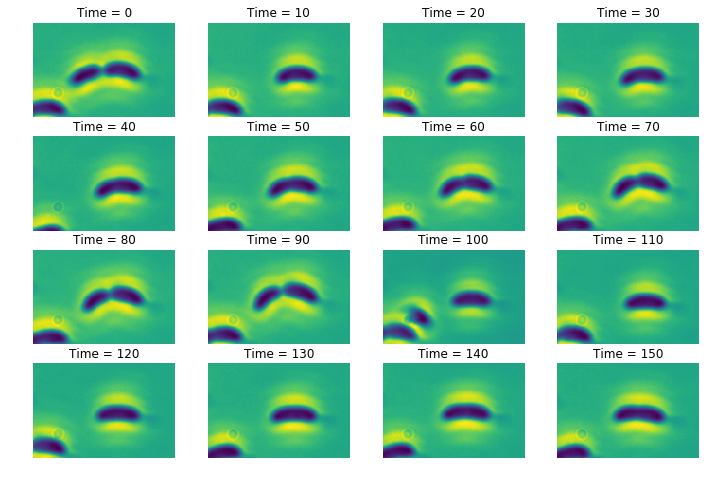

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)
fig,ax = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(img[(4*i+j)*10,:,:])
        ax[i,j].axis('off')
        ax[i,j].set_title('Time = ' + str((4*i+j)*10))

So, now we get the data.  But let's actually look at the histogram of pixel intensities.

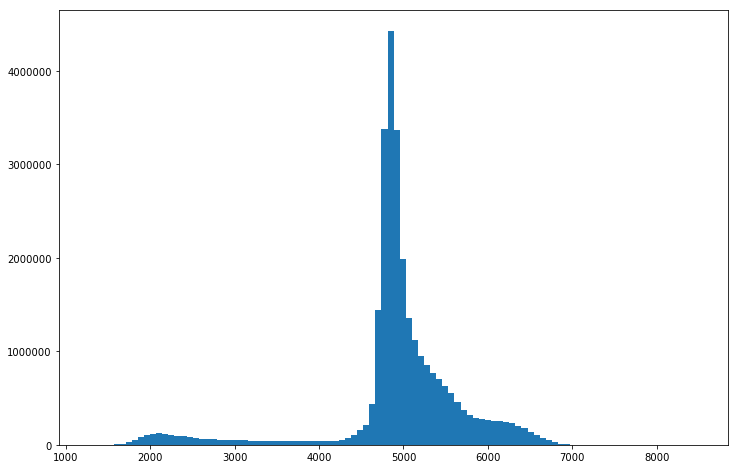

In [3]:
# Reshape image so that it's an array.
img_array = img.reshape([-1])

# Plot the histogram.
_ = plt.hist(img_array,100)

Otsu's method threshold: 3856


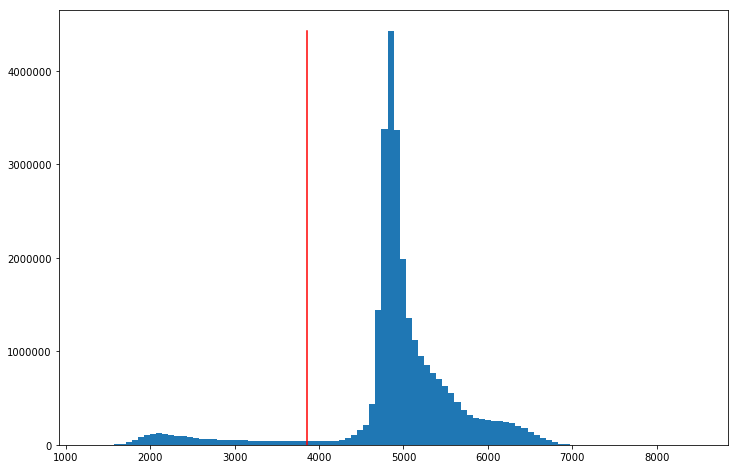

In [4]:
from skimage import filters

# Cells are darker.  Let's look at the darker bits from Otsu's Method!
thresh = filters.threshold_otsu(img_array)
print "Otsu's method threshold: " + str(thresh)

# Plot the histogram.
arr = plt.hist(img_array,100)
plt.plot([thresh,thresh], [0,np.max(arr[0])], color='r')

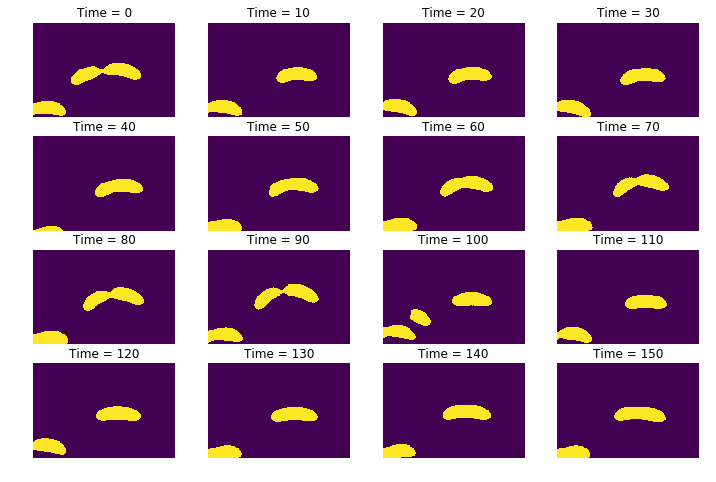

In [5]:
plt.rcParams['figure.figsize'] = (12, 8)
fig,ax = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(img[(4*i+j)*10,:,:] < thresh)
        ax[i,j].axis('off')
        ax[i,j].set_title('Time = ' + str((4*i+j)*10))

Not to bad, eh?  Let's actually try to visualize what this looks like!

Let's save each of those binary images a .png.  Once we do that, we can load them up into [Fiji](https://fiji.sc/)

In [11]:
from os import mkdir
from os.path import join,isdir
import scipy.misc

# Path of the saved images.  CHANGE THIS FOR YOUR COMPUTER.
path_save = 'C:\\Users\\yidar\\Desktop\\bmi260\\bacterium_1_bw'
if not isdir(path_save):
    mkdir(path_save)

# Loop over all images to save.
for i in range(img.shape[0]):
    img_bw = img[i,:,:] < thresh
    path_save_img = join(path_save, str(i)+'.png')
    scipy.misc.imsave(path_save_img, img_bw)

Okay, so now you should have a folder with looks sorta like this:

![](20170414_figures/binaries.png)

Now, open up Fiji, for example.  And go to
```
> File > Import > Image Sequence
```

![](20170414_figures/Fiji_1.png)

In the browse window, go to the folder that holds your images, and now just choose the first image in that folder and click "ok".  You should see an image like what you see below:

![](20170414_figures/Fiji_2.png)

So, you should see a field for Number of Images.  By default, it should say 1900 images, since there are 1900 images in this stack.  Just to not overload the system, let's bring that down to 200, like I did above.  Hit OK.  You should see a visualizer pop up.

![](20170414_figures/Fiji_3.png)

Feel free to scroll through to see what imagestack you've read in.  Now, to make a 3D view of the binary figure (where each frame is seen as a z-slice through the figure), you can click:
```
> Plugins > 3D Viewer
```

![](20170414_figures/Fiji_4.png)

Finally, you should see a figure like this pop up:

![](20170414_figures/Fiji_5.png)

Just click OK, and a 3D model should pop up.  Try to drag and drop the figure until you see a good view.

![](20170414_figures/cell_vis.png)

You can sort of see the single cell constantly grow until it splits off.

## Tracking Cell Area

To track the cell, we need to create some set of rules.  A really shit set of rules might be:

1. pick a "anchor" pixel
2. binarize each image
3. label the connected components (CCs)
4. find CC whose center pixel is closest to anchor pixel

0

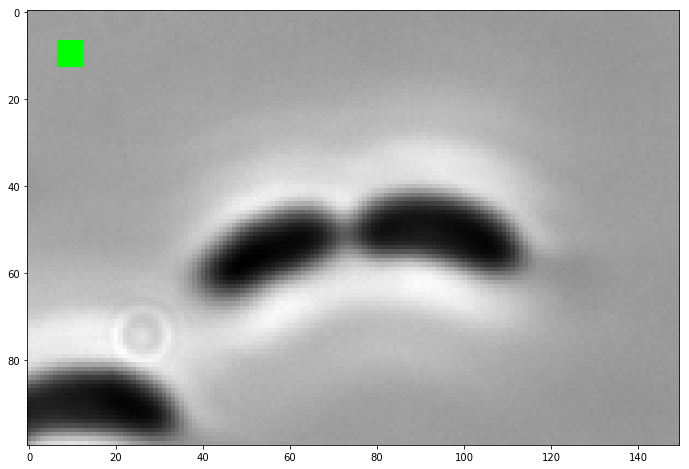

In [12]:
# Picking an anchor pixel.

def anchor_pixel(img, r, c, radius=3, ax=None):
    '''
    ?
    INPUTS:
    - img: (2d.array or 3d.array) ?
    - r: (int) ?
    - c: (int) ?
    - radius: (int) ?
    - ax: (axes) ?
    OUTPUTS:
    - N/A
    '''
    # ?
    img = img.astype(np.float32)
    img -= np.min(img)
    img /= np.max(img)
    # ?
    if len(img.shape) == 2:
        img = img.reshape([img.shape[0], img.shape[1], 1])
        img = np.concatenate([img,img,img], axis=2)
    # ?
    img[r-radius:r+radius, c-radius:c+radius, 0] = 0
    img[r-radius:r+radius, c-radius:c+radius, 1] = 1
    img[r-radius:r+radius, c-radius:c+radius, 2] = 0
    # ?
    if ax:
        ax.imshow(img)
    else:
        plt.imshow(img)
    return 0

img_slice = img[0,:,:]
anchor_pixel(img_slice, 10, 10)

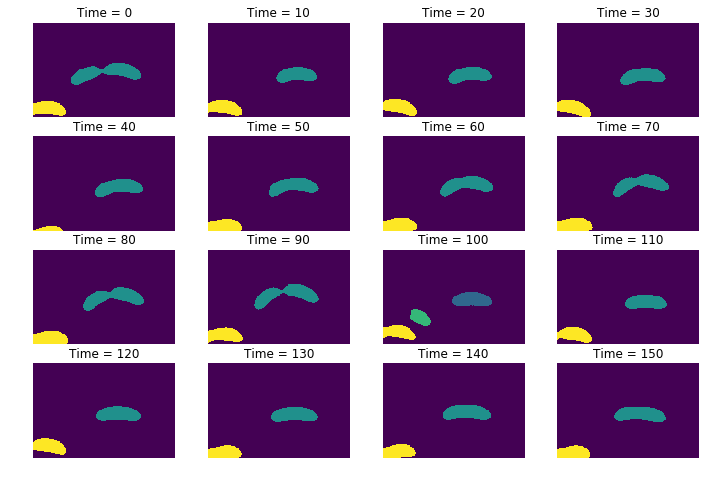

In [13]:
from skimage import measure

# Binarize each image and find connected components.
fig,ax = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        bw = img[(4*i+j)*10,:,:] < thresh
        labs = measure.label(bw)
        ax[i,j].imshow(labs)
        ax[i,j].axis('off')
        ax[i,j].set_title('Time = ' + str((4*i+j)*10))

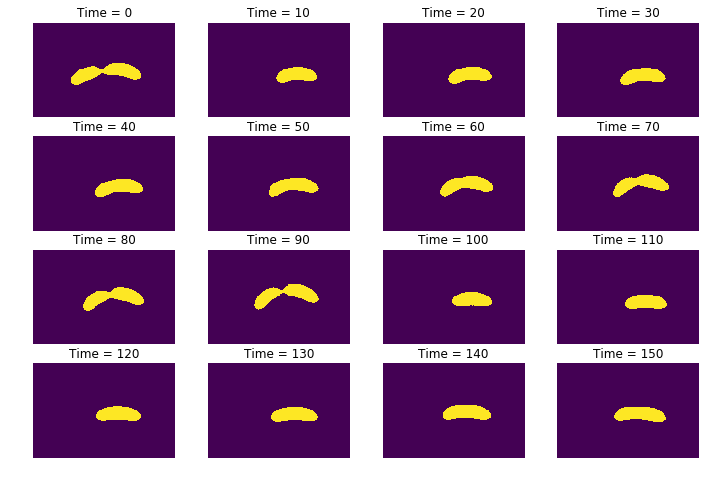

In [18]:
# Loop over every image and find CC closest to anchor pixel.
r = 55
c = 110

CCs = np.zeros(img.shape)           #initialize matrix
for i in range(img.shape[0]):       #loop over every slice
    img_i = img[i,:,:]              #take in slice
    bw    = img_i < thresh          #binarize
    labs  = measure.label(bw)       #label CC's
    mindist = 1e10                  #temporary variable
    for j in range(1,np.max(labs)): #loop over all CC's
        CC = (labs == j)            #isolate CC
        rs,cs = np.where(CC)        #find pixels
        dist2 = (rs-r)**2 + (cs-c)**2 #find distance
        if np.min(dist2) < mindist:
            mindist = np.min(dist2)
            CCs[i,:,:] = CC

fig,ax = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        CC = CCs[(4*i+j)*10,:,:]
        ax[i,j].imshow(CC)
        ax[i,j].axis('off')
        ax[i,j].set_title('Time = ' + str((4*i+j)*10))

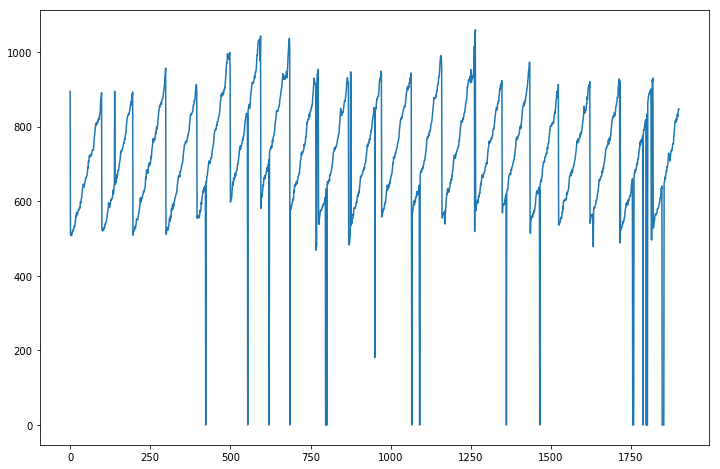

In [20]:
# Now, let's measure the area of this cell throughout time.
areas = np.sum(CCs, axis=(1,2))
print "Is that linear or exponential?"
plt.plot(areas)

## (Implicit Representation)